```{contents}
```

## Hyper-Parameter Intiution

### Reminder: What SVR Does

* SVR tries to fit a function $f(x) = w^T \phi(x) + b$ that predicts continuous values.
* Instead of minimizing raw error, it tries to keep predictions **within an ε-tube** of the actual values.
* Errors **inside the tube** → ignored (no penalty).
* Errors **outside the tube** → penalized linearly.

So the **hyperparameters (C, ε, γ)** control how flexible, tolerant, or strict the regression line is.

---

### Key Hyperparameters and Their Intuition

#### (a) **C – Regularization parameter**

* Controls the **trade-off** between model complexity and tolerance of errors.
* **High C** → model tries hard to minimize error (more support vectors, tighter fit, risk of overfitting).
* **Low C** → allows more slack, smoother curve (risk of underfitting).

📌 Intuition: C = “How much do I care about points outside the tube?”

---

#### (b) **ε (Epsilon – Tube width)**

* Defines the **width of the ε-insensitive zone** (the tube around the regression line).
* Errors inside ±ε are ignored.
* **Large ε** → fewer support vectors, simpler and smoother function, but may miss details.
* **Small ε** → more support vectors, more sensitive to data (risk of overfitting).

📌 Intuition: ε = “How much error am I willing to ignore?”

---

### (c) **γ (Gamma – Kernel coefficient, for RBF/poly kernels)**

* Defines the **influence of each training point** in the kernel space.
* **High γ** → each point has very narrow influence → highly flexible, wiggly function (overfit).
* **Low γ** → points have wide influence → smoother function (underfit).

📌 Intuition: γ = “How far does one point’s influence reach?”

---

### Interaction Between Hyperparameters

* **C and ε:**

  * Large ε + low C → very simple model (underfit).
  * Small ε + high C → very complex model (overfit).

* **C and γ (in RBF):**

  * High C + high γ → model bends a lot to capture data, very overfitted.
  * Low C + low γ → flat line, ignores structure.

---

### Visual Intuition

* **C** = penalty strength → imagine a ruler that bends: stiff (high C) vs flexible (low C).
* **ε** = tube size → imagine drawing a road around the line: wide road (large ε, tolerant) vs narrow road (small ε, strict).
* **γ** = scope of influence → spotlight radius: wide light (low γ) vs narrow beam (high γ).

---

### Tuning Strategy

* Start with defaults: `C=1.0`, `ε=0.1`, `γ=scale`.
* Use **GridSearchCV or RandomizedSearchCV** to explore:

  * `C` on log scale (e.g., \[0.1, 1, 10, 100])
  * `ε` on small values (e.g., \[0.001, 0.01, 0.1, 0.5])
  * `γ` on log scale (e.g., \[0.01, 0.1, 1, 10])
* Evaluate with metrics like RMSE or $R^2$.

---

**Summary of Intuition:**

* **C** → “How hard should I punish errors?”
* **ε** → “What counts as an error?”
* **γ** → “How far does one data point’s influence reach?”

Together, they balance **bias–variance trade-off** in SVR.



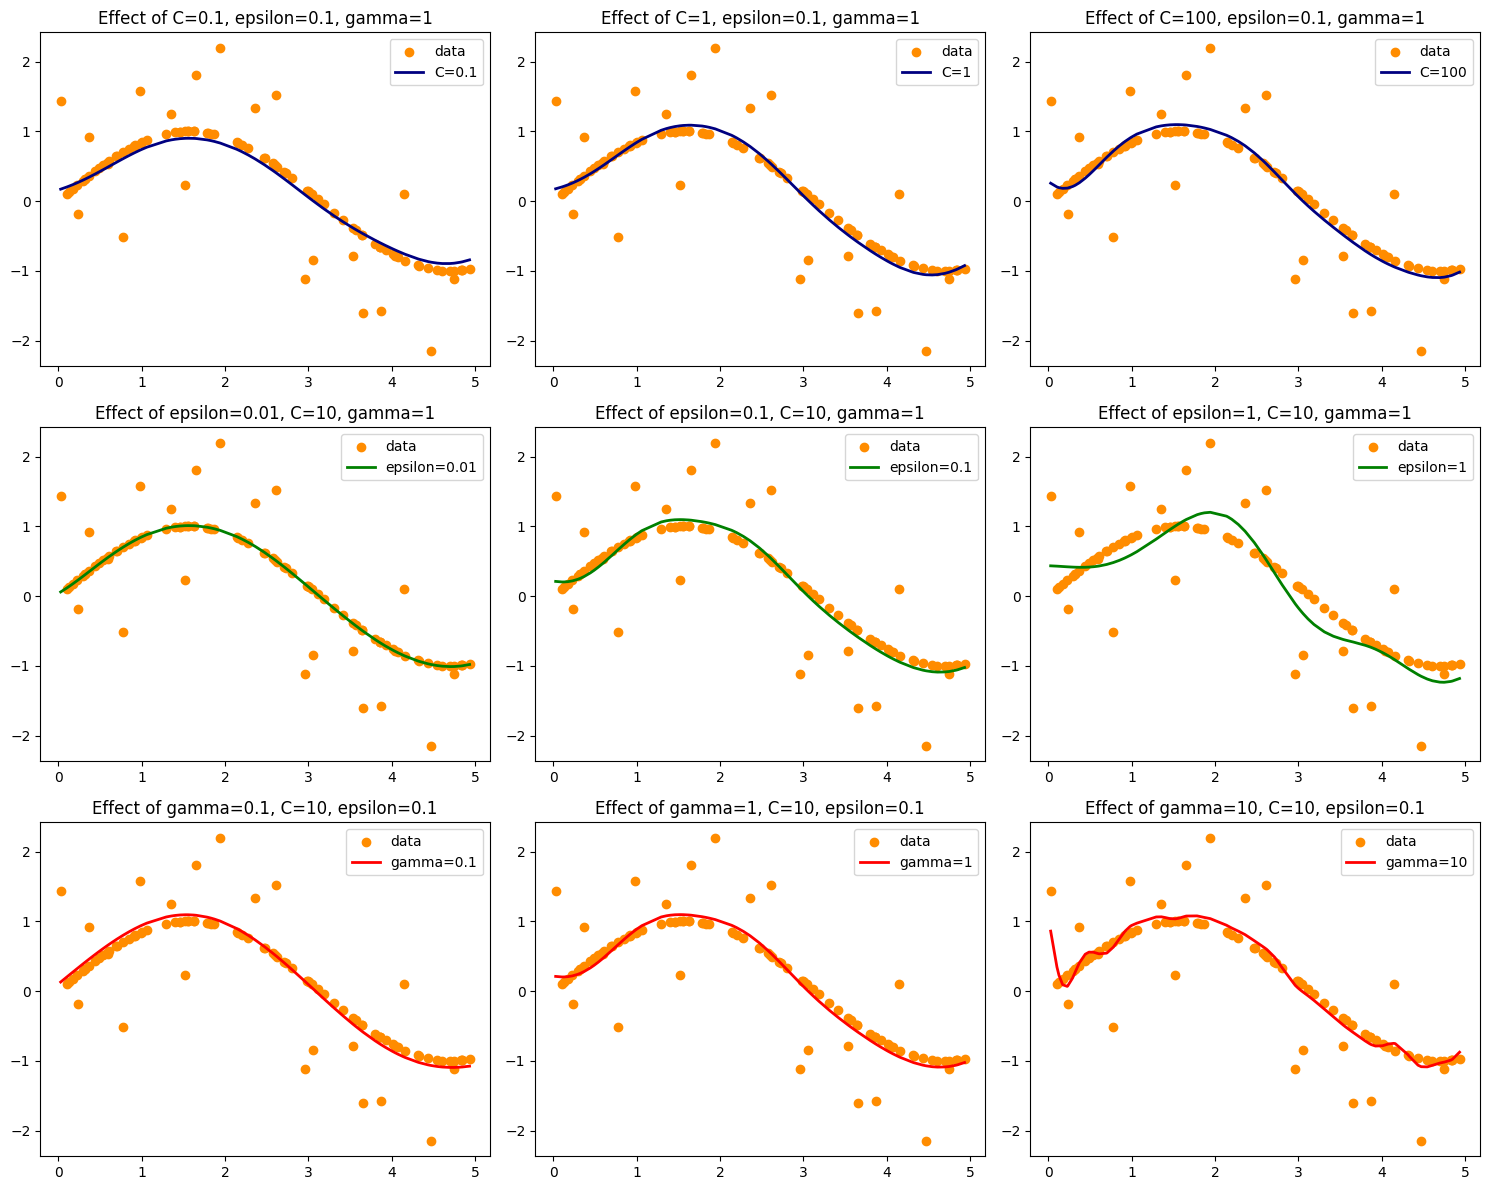

In [3]:
# Re-run after reset

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Generate synthetic data
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(20))  # add noise

# Define hyperparameter settings to visualize
params = {
    "C": [0.1, 1, 100],
    "epsilon": [0.01, 0.1, 1],
    "gamma": [0.1, 1, 10]
}

# Plot SVR with varying C
plt.figure(figsize=(15, 12))

for i, C in enumerate(params["C"], 1):
    svr = SVR(kernel='rbf', C=C, epsilon=0.1, gamma=1)
    y_pred = svr.fit(X, y).predict(X)
    plt.subplot(3, 3, i)
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(X, y_pred, color='navy', lw=2, label=f'C={C}')
    plt.title(f'Effect of C={C}, epsilon=0.1, gamma=1')
    plt.legend()

# Plot SVR with varying epsilon
for i, eps in enumerate(params["epsilon"], 1):
    svr = SVR(kernel='rbf', C=10, epsilon=eps, gamma=1)
    y_pred = svr.fit(X, y).predict(X)
    plt.subplot(3, 3, 3+i)
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(X, y_pred, color='green', lw=2, label=f'epsilon={eps}')
    plt.title(f'Effect of epsilon={eps}, C=10, gamma=1')
    plt.legend()

# Plot SVR with varying gamma
for i, g in enumerate(params["gamma"], 1):
    svr = SVR(kernel='rbf', C=10, epsilon=0.1, gamma=g)
    y_pred = svr.fit(X, y).predict(X)
    plt.subplot(3, 3, 6+i)
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(X, y_pred, color='red', lw=2, label=f'gamma={g}')
    plt.title(f'Effect of gamma={g}, C=10, epsilon=0.1')
    plt.legend()

plt.tight_layout()
plt.show()



* **Top row (C variation):**

  * Low $C$ → smoother, underfits.
  * High $C$ → fits closely to noisy points, risk of overfitting.

* **Middle row (ε variation):**

  * Large ε → wide tolerance zone, many errors ignored → simpler curve.
  * Small ε → narrow tolerance zone, more sensitive to fluctuations.

* **Bottom row (γ variation):**

  * Low γ → very smooth, ignores local variations.
  * High γ → highly flexible, wiggly curve, overfits noise.

👉 This shows exactly how **C, ε, γ** control the **bias–variance trade-off** in SVR.

Do you want me to also **overlay the ε-tube** (margin) on the plots so you can clearly see how it changes?


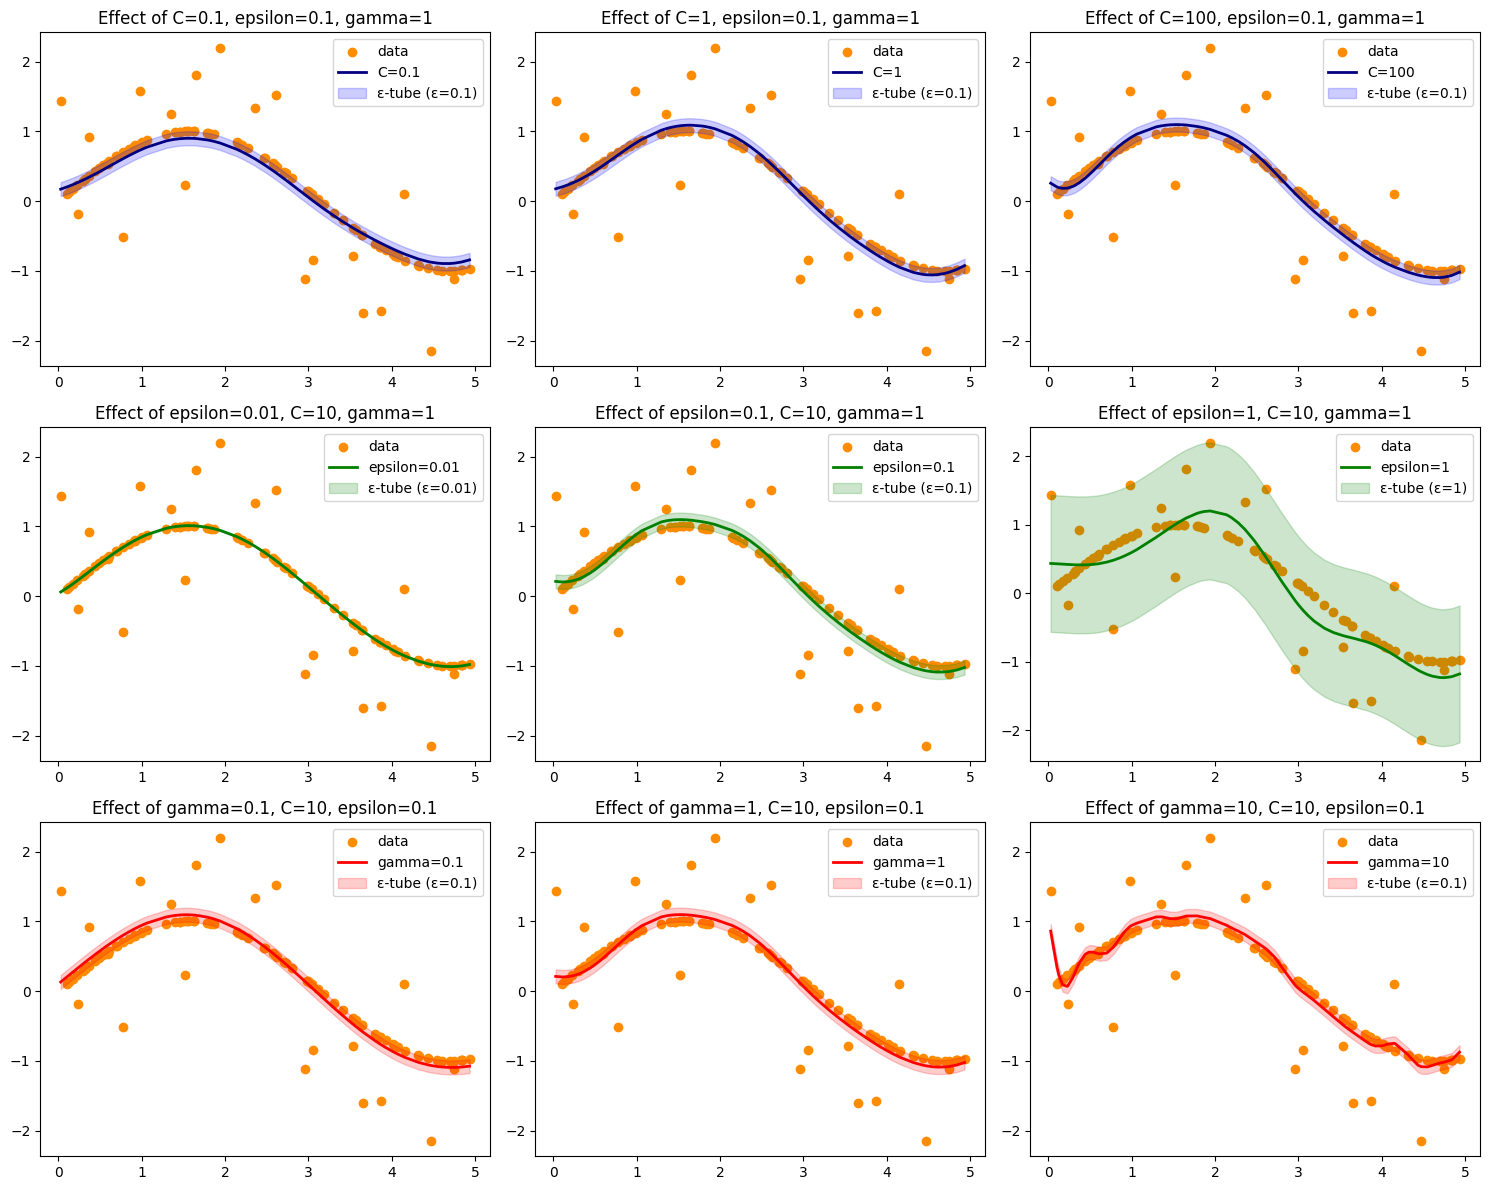

In [4]:
# Re-plot with epsilon tube visualization

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Generate synthetic data
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(20))  # add noise

# Define hyperparameter settings to visualize
params = {
    "C": [0.1, 1, 100],
    "epsilon": [0.01, 0.1, 1],
    "gamma": [0.1, 1, 10]
}

# Function to plot epsilon tube
def plot_epsilon_tube(X, y_pred, eps, color):
    plt.fill_between(
        X.ravel(),
        y_pred - eps,
        y_pred + eps,
        color=color,
        alpha=0.2,
        label=f'ε-tube (ε={eps})'
    )

# Plot SVR with varying C
plt.figure(figsize=(15, 12))

for i, C in enumerate(params["C"], 1):
    svr = SVR(kernel='rbf', C=C, epsilon=0.1, gamma=1)
    y_pred = svr.fit(X, y).predict(X)
    plt.subplot(3, 3, i)
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(X, y_pred, color='navy', lw=2, label=f'C={C}')
    plot_epsilon_tube(X, y_pred, 0.1, 'blue')
    plt.title(f'Effect of C={C}, epsilon=0.1, gamma=1')
    plt.legend()

# Plot SVR with varying epsilon
for i, eps in enumerate(params["epsilon"], 1):
    svr = SVR(kernel='rbf', C=10, epsilon=eps, gamma=1)
    y_pred = svr.fit(X, y).predict(X)
    plt.subplot(3, 3, 3+i)
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(X, y_pred, color='green', lw=2, label=f'epsilon={eps}')
    plot_epsilon_tube(X, y_pred, eps, 'green')
    plt.title(f'Effect of epsilon={eps}, C=10, gamma=1')
    plt.legend()

# Plot SVR with varying gamma
for i, g in enumerate(params["gamma"], 1):
    svr = SVR(kernel='rbf', C=10, epsilon=0.1, gamma=g)
    y_pred = svr.fit(X, y).predict(X)
    plt.subplot(3, 3, 6+i)
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(X, y_pred, color='red', lw=2, label=f'gamma={g}')
    plot_epsilon_tube(X, y_pred, 0.1, 'red')
    plt.title(f'Effect of gamma={g}, C=10, epsilon=0.1')
    plt.legend()

plt.tight_layout()
plt.show()


Here’s the updated visualization ✅ with the **ε-tube (shaded bands)** drawn around each SVR prediction line.

* The **ε-tube** shows the tolerance region where errors are ignored.
* **Smaller ε** → narrow tube, more points fall outside → stricter model.
* **Larger ε** → wide tube, fewer points outside → looser model.

This makes it clear how **C, ε, and γ** shape the SVR function **and** its tolerance to error.

👉 Do you want me to also generate a **3D surface plot** (SVR predictions across input space) so you can see how γ and C interact visually?


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'C': 1, 'epsilon': 0.1, 'gamma': 0.1}
RMSE: 0.369
R²: 0.813
Adjusted R²: 0.806


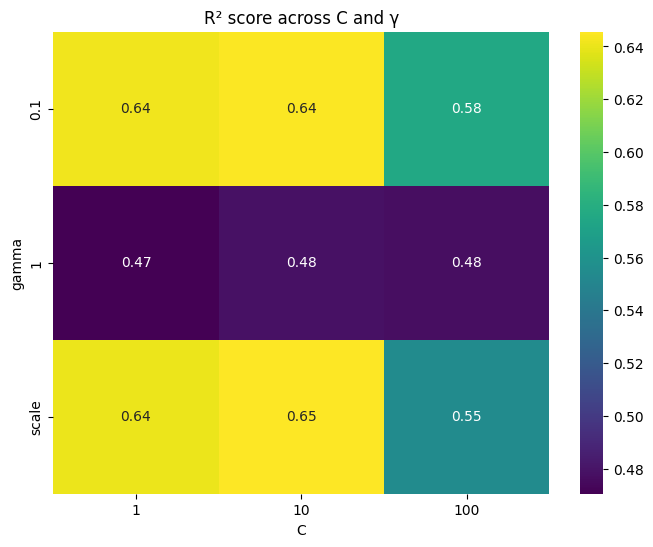

In [19]:
## Demonstration

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = fetch_california_housing(as_frame=True)
X, y = data.data.loc[:1000], data.target.loc[:1000]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for SVR!)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
param_grid = {
    "C": [1, 10, 100],
    "epsilon": [0.01, 0.1, 1],
    "gamma": ["scale", 0.1, 1]
}

svr = SVR(kernel="rbf")

grid = GridSearchCV(svr, param_grid, cv=3, scoring="r2", verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

# Best params
print("Best Parameters:", grid.best_params_)

# Predict
y_pred = grid.best_estimator_.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)

print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")
print(f"Adjusted R²: {adj_r2:.3f}")

import seaborn as sns
import matplotlib.pyplot as plt

# Convert results to DataFrame
results = pd.DataFrame(grid.cv_results_)

# Pivot table for heatmap
pivot = results.pivot_table(values="mean_test_score", index="param_gamma", columns="param_C")

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, cmap="viridis")
plt.title("R² score across C and γ")
plt.ylabel("gamma")
plt.xlabel("C")
plt.show()
